In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../dataset/ai_job_trends_dataset.csv")
df.head()


,Job Title,Industry,Job Status,AI Impact Level,Median Salary (USD),Required Education,Experience Required (Years),Job Openings (2024),Projected Openings (2030),Remote Work Ratio (%),Automation Risk (%),Location,Gender Diversity (%)
0,Investment analyst,IT,Increasing,Moderate,42109.76,Master’s Degree,5,1515,6342,55.96,28.28,UK,44.63
1,"Journalist, newspaper",Manufacturing,Increasing,Moderate,132298.57,Master’s Degree,15,1243,6205,16.81,89.71,USA,66.39
2,Financial planner,Finance,Increasing,Low,143279.19,Bachelor’s Degree,4,3338,1154,91.82,72.97,Canada,41.13
3,Legal secretary,Healthcare,Increasing,High,97576.13,Associate Degree,15,7173,4060,1.89,99.94,Australia,65.76
4,Aeronautical engineer,IT,Increasing,Low,60956.63,Master’s Degree,13,5944,7396,53.76,37.65,Germany,72.57


In [3]:
df.shape

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job Title                    30000 non-null  object 
 1   Industry                     30000 non-null  object 
 2   Job Status                   30000 non-null  object 
 3   AI Impact Level              30000 non-null  object 
 4   Median Salary (USD)          30000 non-null  float64
 5   Required Education           30000 non-null  object 
 6   Experience Required (Years)  30000 non-null  int64  
 7   Job Openings (2024)          30000 non-null  int64  
 8   Projected Openings (2030)    30000 non-null  int64  
 9   Remote Work Ratio (%)        30000 non-null  float64
 10  Automation Risk (%)          30000 non-null  float64
 11  Location                     30000 non-null  object 
 12  Gender Diversity (%)         30000 non-null  float64
dtypes: float64(4), i

In [4]:
df.columns = (
    df.columns
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("(", "")
    .str.replace(")", "")
    .str.replace("%", "percent")
)

df.columns


Index(['job_title', 'industry', 'job_status', 'ai_impact_level',
       'median_salary_usd', 'required_education', 'experience_required_years',
       'job_openings_2024', 'projected_openings_2030',
       'remote_work_ratio_percent', 'automation_risk_percent', 'location',
       'gender_diversity_percent'],
      dtype='object')

In [5]:
target = "automation_risk_percent"

features = [
    "experience_required_years",
    "ai_impact_level",
    "projected_openings_2030",
    "remote_work_ratio_percent"
]


In [8]:
df[features].dtypes


experience_required_years      int64
ai_impact_level               object
projected_openings_2030        int64
remote_work_ratio_percent    float64
dtype: object

In [9]:
ai_impact_mapping = {
    "Low": 0,
    "Moderate": 1,
    "High": 2
}

df["ai_impact_level"] = df["ai_impact_level"].map(ai_impact_mapping)


In [11]:
df["ai_impact_level"].value_counts()

df[features].dtypes

experience_required_years      int64
ai_impact_level                int64
projected_openings_2030        int64
remote_work_ratio_percent    float64
dtype: object

In [13]:
df[features] = df[features].fillna(df[features].median())

df[features].isnull().sum()


experience_required_years    0
ai_impact_level              0
projected_openings_2030      0
remote_work_ratio_percent    0
dtype: int64

In [14]:
def risk_category(risk):
    if risk < 30:
        return "Low"
    elif risk < 60:
        return "Medium"
    else:
        return "High"

df["risk_category"] = df[target].apply(risk_category)


df["risk_category"].value_counts()


risk_category
High      12013
Medium     9067
Low        8920
Name: count, dtype: int64

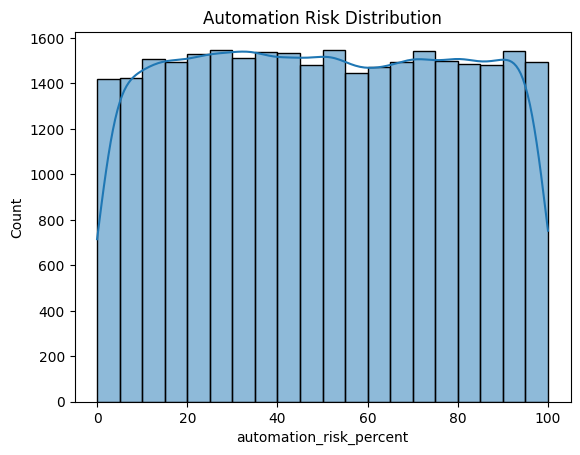

In [15]:
plt.figure()
sns.histplot(df[target], bins=20, kde=True)
plt.title("Automation Risk Distribution")
plt.show()


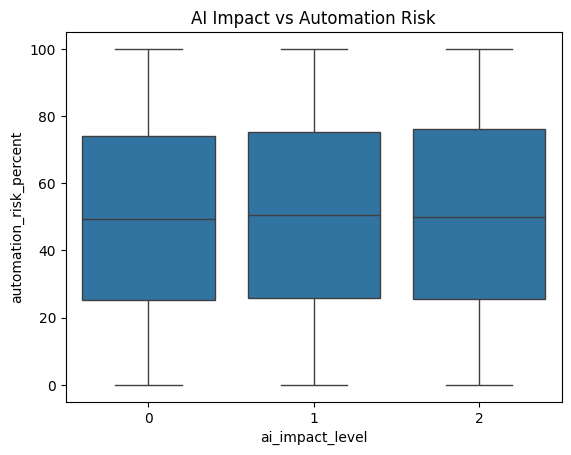

In [16]:
plt.figure()
sns.boxplot(x=df["ai_impact_level"], y=df[target])
plt.title("AI Impact vs Automation Risk")
plt.show()
